In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from tqdm import tqdm
from joblib import Parallel, delayed

In [2]:
df = pd.read_csv('../Datasets/data_with_normalization.csv') 
df = df.drop(columns=['URL', 'Domain', 'Title'])
df

,URLLength,DomainLength,IsDomainIP,TLD,TLDLength,NoOfSubDomain,NoOfLettersInURL,NoOfDegitsInURL,NoOfEqualsInURL,NoOfQMarkInURL,...,NoOfiFrame,HasExternalFormSubmit,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,NoOfCSS,NoOfEmptyRef,label
0,-0.891300,-1.437329,0,191,-1.449374,-1.934269,-0.789202,0.119473,-0.119462,-0.146444,...,-0.346864,0,0,0,0,0,0,-0.519592,-0.292089,0
1,0.019356,0.603674,0,179,0.524801,-0.250327,0.196725,-0.356586,-0.119462,-0.146444,...,-0.346864,0,0,0,0,0,0,-0.519592,-0.292089,0
2,0.360852,1.113925,0,179,0.524801,-0.250327,0.126302,1.071590,-0.119462,-0.146444,...,-0.346864,0,1,0,1,1,0,-0.225707,-0.292089,0
3,0.360852,1.241488,0,112,0.524801,-0.250327,0.619265,-0.356586,-0.119462,-0.146444,...,-0.346864,0,0,0,0,0,0,-0.519592,-0.292089,0
4,-0.549804,-0.671953,0,179,0.524801,1.433615,-0.648355,-0.118556,-0.119462,-0.146444,...,-0.346864,0,0,0,0,0,0,-0.519592,-0.292089,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185935,-0.777468,-1.182204,0,355,0.524801,-0.250327,-0.859625,-0.356586,-0.119462,-0.146444,...,-0.346864,1,1,0,0,0,0,2.321298,-0.292089,1
185936,-0.492888,-0.544390,0,179,0.524801,-0.250327,-0.507508,-0.356586,-0.119462,-0.146444,...,0.494416,0,1,0,0,1,0,-0.519592,-0.292089,1
185937,-0.606720,-0.799516,0,179,0.524801,-0.250327,-0.648355,-0.356586,-0.119462,-0.146444,...,2.737827,1,1,0,0,1,0,-0.421631,-0.292089,1
185938,-0.435972,-0.416828,0,179,0.524801,-0.250327,-0.437085,-0.356586,-0.119462,-0.146444,...,-0.346864,0,1,0,0,0,0,0.362063,-0.292089,1


In [3]:
X = df.drop(columns=['label'])  
y = df['label']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [15]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [17]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(accuracy*100,"%")
print("Train Accuracy:", accuracy_train*100, "%")

99.93546305259761 %
Train Accuracy: 99.9308532706403 %


In [7]:
i=1
while i<10000000:
    model = LogisticRegression(max_iter=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(i)
    print(accuracy*100,"%")  
    i=i*100
    print("-"*1000)

    


1
50.125488508837975 %
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

c:\Users\Abhirup Das\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Abhirup Das\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

100
99.76874260514144 %
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [8]:

coreset_sizes = []
accuracies = []

best_accuracy = -1
best_size = 0

for i in range(10, 500, 10):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

    coreset_size = i
    selected_indices = np.random.choice(X_train.shape[0], size=coreset_size, replace=False)

    X_coreset = X_train.iloc[selected_indices]
    y_coreset = y_train.iloc[selected_indices]

    rf_model.fit(X_coreset, y_coreset)

    y_pred_coreset = rf_model.predict(X_test)
    accuracy_coreset = accuracy_score(y_test, y_pred_coreset)
    
    coreset_sizes.append(coreset_size)
    accuracies.append(accuracy_coreset)
    
    best_accuracy = max(accuracy_coreset, best_accuracy)
    if best_accuracy == accuracy_coreset:
        best_size = i
    
    print("Accuracy with Random Forest and Random Sampling Coreset: ", accuracy_coreset)
    print("-" * 100)



Accuracy with Random Forest and Random Sampling Coreset:  0.9484421497974257
----------------------------------------------------------------------------------------------------
Accuracy with Random Forest and Random Sampling Coreset:  0.978433903409702
----------------------------------------------------------------------------------------------------
Accuracy with Random Forest and Random Sampling Coreset:  0.9709763005987595
----------------------------------------------------------------------------------------------------
Accuracy with Random Forest and Random Sampling Coreset:  0.9773941414793302
----------------------------------------------------------------------------------------------------
Accuracy with Random Forest and Random Sampling Coreset:  0.9778423147251801
----------------------------------------------------------------------------------------------------
Accuracy with Random Forest and Random Sampling Coreset:  0.9863038256068266
----------------------------------

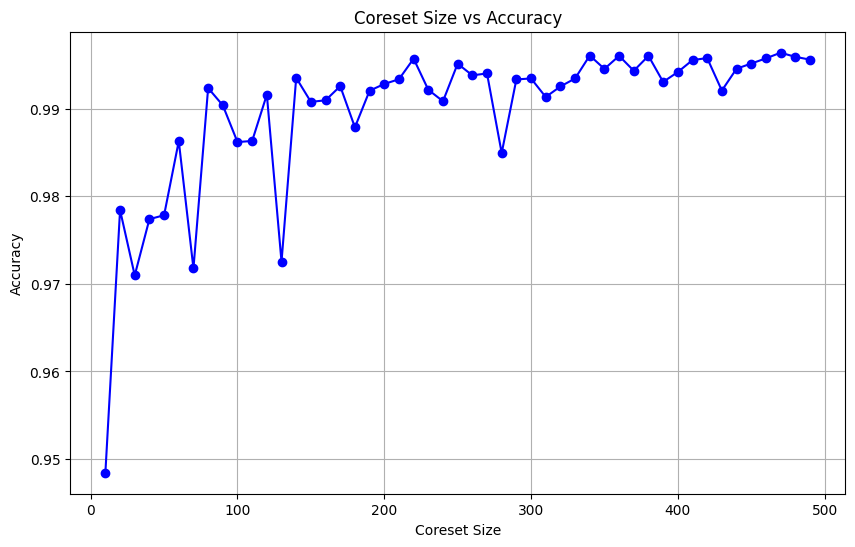

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(coreset_sizes, accuracies, marker='o', linestyle='-', color='b')

plt.title('Coreset Size vs Accuracy')
plt.xlabel('Coreset Size')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

In [10]:
print(best_size)
best_accuracy

470


0.9963966871033667

In [11]:
best_accuracy=-1
best_size=i

coreset_sizes = []
accuracies = []

for i in range(10, 500, 10):
    log_reg_model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

    coreset_size = i
    selected_indices = np.random.choice(X_train.shape[0], size=coreset_size, replace=False)

    X_coreset = X_train.iloc[selected_indices]
    y_coreset = y_train.iloc[selected_indices]

    log_reg_model.fit(X_coreset, y_coreset)
    y_pred_coreset = log_reg_model.predict(X_test)
    accuracy_coreset = accuracy_score(y_test, y_pred_coreset)
    
    coreset_sizes.append(coreset_size)
    accuracies.append(accuracy_coreset)
    
    best_accuracy = max(accuracy_coreset, best_accuracy)
    if best_accuracy == accuracy_coreset:
        best_size = i
    
    print("Accuracy with Logistic Regression and Random Sampling Coreset: ", accuracy_coreset)
    print("-" * 100)

Accuracy with Logistic Regression and Random Sampling Coreset:  0.7801799863755333
----------------------------------------------------------------------------------------------------
Accuracy with Logistic Regression and Random Sampling Coreset:  0.9402495428632892
----------------------------------------------------------------------------------------------------
Accuracy with Logistic Regression and Random Sampling Coreset:  0.9745616865655587
----------------------------------------------------------------------------------------------------
Accuracy with Logistic Regression and Random Sampling Coreset:  0.9646122405076907
----------------------------------------------------------------------------------------------------
Accuracy with Logistic Regression and Random Sampling Coreset:  0.9293141156645512
----------------------------------------------------------------------------------------------------
Accuracy with Logistic Regression and Random Sampling Coreset:  0.97438241726721

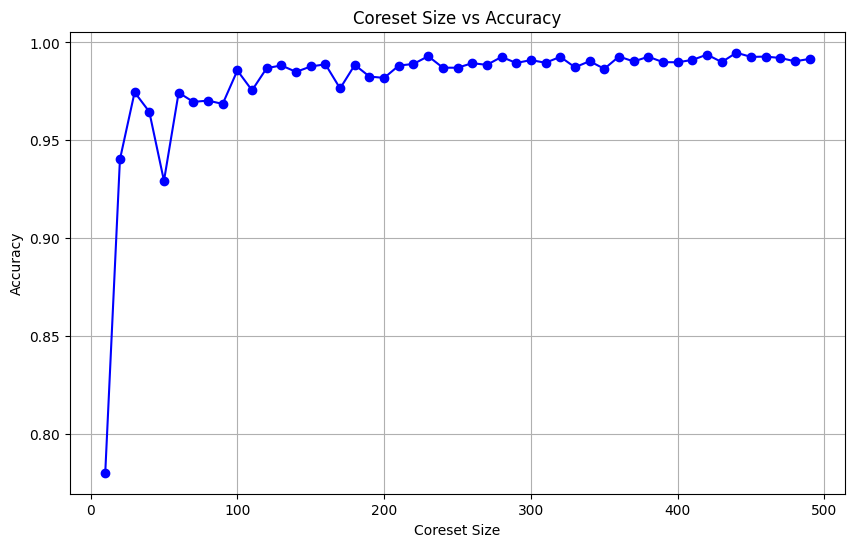

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(coreset_sizes, accuracies, marker='o', linestyle='-', color='b')

plt.title('Coreset Size vs Accuracy')
plt.xlabel('Coreset Size')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()


In [13]:
print(best_size)
best_accuracy

440


0.994765336488473

we iteratively select the most informative data points based on their contribution to the model's decision boundary.

In this case, the greedy algorithm focuses on selecting data points that provide the best approximation of the full dataset in terms of minimizing the model's loss function.

Below is a simplified approach to a greedy selection method:

python
Copy code


In [14]:

# rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) 
# coreset_size = 60  
# selected_indices = []

# initial_point = np.random.choice(X_train.shape[0])  
# selected_indices.append(initial_point)

# def evaluate_point(i, selected_indices, X_train, y_train, rf_model):
#     temp_indices = selected_indices + [i]
#     if len(np.unique(y_train.iloc[temp_indices])) < 2:  
#         return None, None
    
#     rf_model.fit(X_train.iloc[temp_indices], y_train.iloc[temp_indices])
    
#     current_loss = np.mean((rf_model.predict(X_train.iloc[[i]]) != y_train.iloc[i]))
#     return i, current_loss

# for _ in tqdm(range(coreset_size - 1), desc="Greedy Coreset Construction", ncols=100):
#     remaining_indices = list(set(range(X_train.shape[0])) - set(selected_indices))
    
#     results = Parallel(n_jobs=-1)(delayed(evaluate_point)(i, selected_indices, X_train, y_train, rf_model) for i in remaining_indices)
    
#     best_point = None
#     max_informative_gain = -float('inf')
#     for point, loss in results:
#         if point is not None and loss > max_informative_gain:
#             max_informative_gain = loss
#             best_point = point
    
#     if best_point is not None:
#         selected_indices.append(best_point)

# X_coreset = X_train.iloc[selected_indices]
# y_coreset = y_train.iloc[selected_indices]

# rf_model.fit(X_coreset, y_coreset)

# y_pred_coreset = rf_model.predict(X_test)
# accuracy_coreset = accuracy_score(y_test, y_pred_coreset)
# print(f"Accuracy with Greedy Coreset using Random Forest (Parallelized): {accuracy_coreset * 100:.2f}%")
